In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle

In [2]:
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

In [3]:
X,y = loadDataSet('data/svm1.txt')

In [4]:
model = SVC(C=1,kernel='linear')
model.fit(X,y)
b=model.intercept_
w = model.coef_

In [5]:
print(model.predict(np.array([[7.886242,0.191813]])))

[1.]


In [6]:
print('b=',b)
print('w=',w)
print('各类别各有多少个支持向量',model.n_support_)
print('各类别的支持向量在训练样本中的索引',model.support_)
print('各类所有的支持向量',model.support_vectors_)
print('支持向量的alpha值',model.dual_coef_)

b= [-3.83775658]
w= [[ 0.81444269 -0.27274371]]
各类别各有多少个支持向量 [2 1]
各类别的支持向量在训练样本中的索引 [17 29 55]
各类所有的支持向量 [[ 4.658191  3.507396]
 [ 3.457096 -0.082216]
 [ 6.080573  0.418886]]
支持向量的alpha值 [[-0.12746518 -0.24133564  0.36880082]]


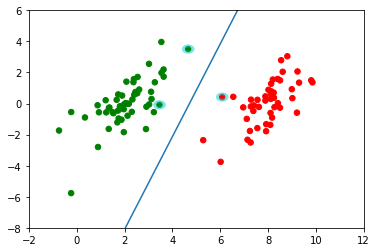

In [7]:
#画图
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(np.array(X)[:,0],np.array(X)[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

x1 = np.arange(-2.0, 12.0, 0.1)
x2 = (-w[0][0]*x1 - b)/w[0][1]
ax.plot(x1,x2.reshape(-1,1))
ax.axis([-2,12,-8,6])

#画支持向量
alphas_non_zeros_index = model.support_
for i in alphas_non_zeros_index:
    circle = Circle((X[i][0], X[i][1]), 0.2, facecolor='none', edgecolor=(0,0.8,0.8), linewidth=3, alpha=0.5)
    ax.add_patch(circle)
plt.show()